In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline


In [59]:
nside = 16
npix = hp.nside2npix(nside)
values = hp.sphtfunc.smoothing(np.random.rand(npix), np.radians(30))

Sigma is 764.389620 arcmin (0.222352 rad) 
-> fwhm is 1800.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


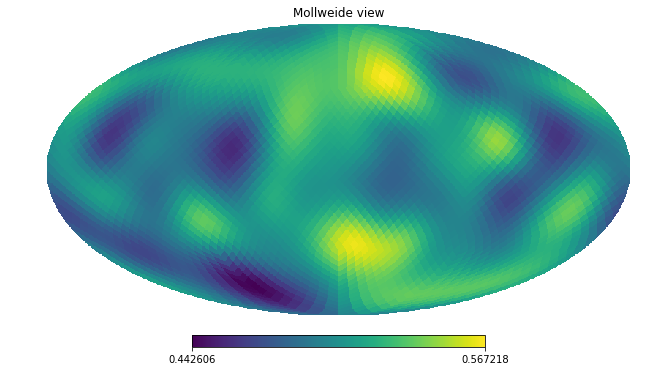

In [60]:
hp.mollview(values)

In [61]:
pix_indx = np.arange(npix)
neighbors = hp.get_all_neighbours(nside, pix_indx)

In [62]:
neighbors[:,[0,2,3]]

array([[ 4,  8, 10],
       [11,  7,  9],
       [ 3,  1,  2],
       [ 2,  0,  1],
       [ 1,  3,  0],
       [ 6, 10,  4],
       [ 5,  9, 11],
       [13, 19, 22]])

array([[   4,    6,    8, ..., 3068, 3069, 3070],
       [  11,    5,    7, ..., 3061, 3063, 3065],
       [   3,    0,    1, ..., 3062, 3064, 3066],
       ...,
       [   6,    8,   10, ..., 3064, 3066, 3060],
       [   5,    7,    9, ..., 3070, 3071, 3068],
       [  13,   16,   19, ..., 3071, 3068, 3069]])

In [63]:
def hp_grow_sort(in_map):
    nside = hp.npix2nside(np.size(in_map))
    pix_indx = np.arange(npix)
    neighbors = hp.get_all_neighbours(nside, pix_indx)
    ordered_hp_indx = []
    remaining_hp = pix_indx.tolist()
    current_max = np.where(in_map == np.max(in_map))[0].min()
    remaining_hp.remove(current_max)
    ordered_hp_indx.append(current_max)
    while len(remaining_hp) > 0:
        current_neighbors = neighbors[:, ordered_hp_indx]
        current_neighbors = np.intersect1d(current_neighbors, remaining_hp)
        remaining_max_indx = current_neighbors[np.where(in_map[current_neighbors] == np.max(in_map[current_neighbors]))[0].min()]
        ordered_hp_indx.append(remaining_max_indx)
        remaining_hp.remove(remaining_max_indx)
        
    return ordered_hp_indx

In [64]:
test = hp_grow_sort(values)

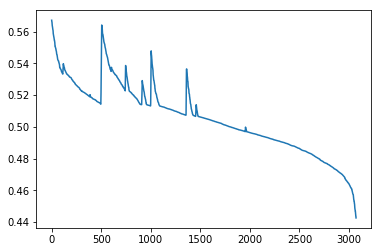

In [67]:
plt.plot(values[test])

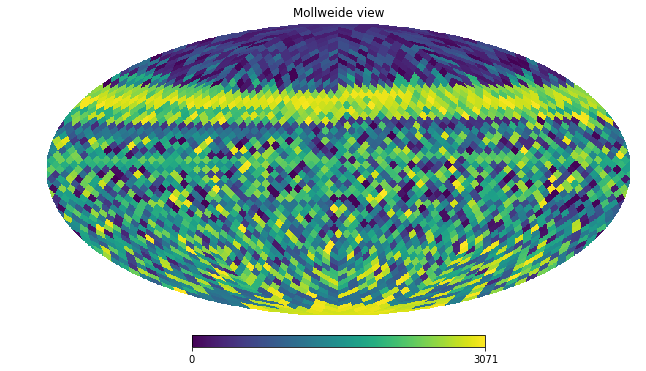

In [66]:
hp.mollview(np.array(test, dtype=float))